# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
# Carregando as bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

In [2]:
# Carregando o dataframe e verificando as colunas
dados = pd.read_csv('/kaggle/input/md07-practice-1/dados_limpos.csv')
#dados = pd.read_csv('demo01.csv')
dados.head(5)

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,True,True,False,False,False,True,False,False,False,False
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,False,True,False,False,False,True,False,False,False,False
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,False,True,False,False,False,True,False,False,False,False


In [3]:
dados.isna().sum()

Unnamed: 0                                0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_M                                    0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated          

In [4]:
dados.dtypes

Unnamed: 0                                  int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool


In [5]:
target = dados.mau
alvo = dados.drop('mau', axis= 1)

In [6]:
target_train, target_teste, alvo_train, alvo_teste = train_test_split(target,alvo, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
#1. Defina um objeto com a função da árvore de decisão vista em aula
dados_treino = DecisionTreeClassifier(random_state=100)

In [8]:
#2.Treine o modelo com os dados que você separou para treinamento.
dados_treino = dados_treino.fit(alvo_train,target_train)

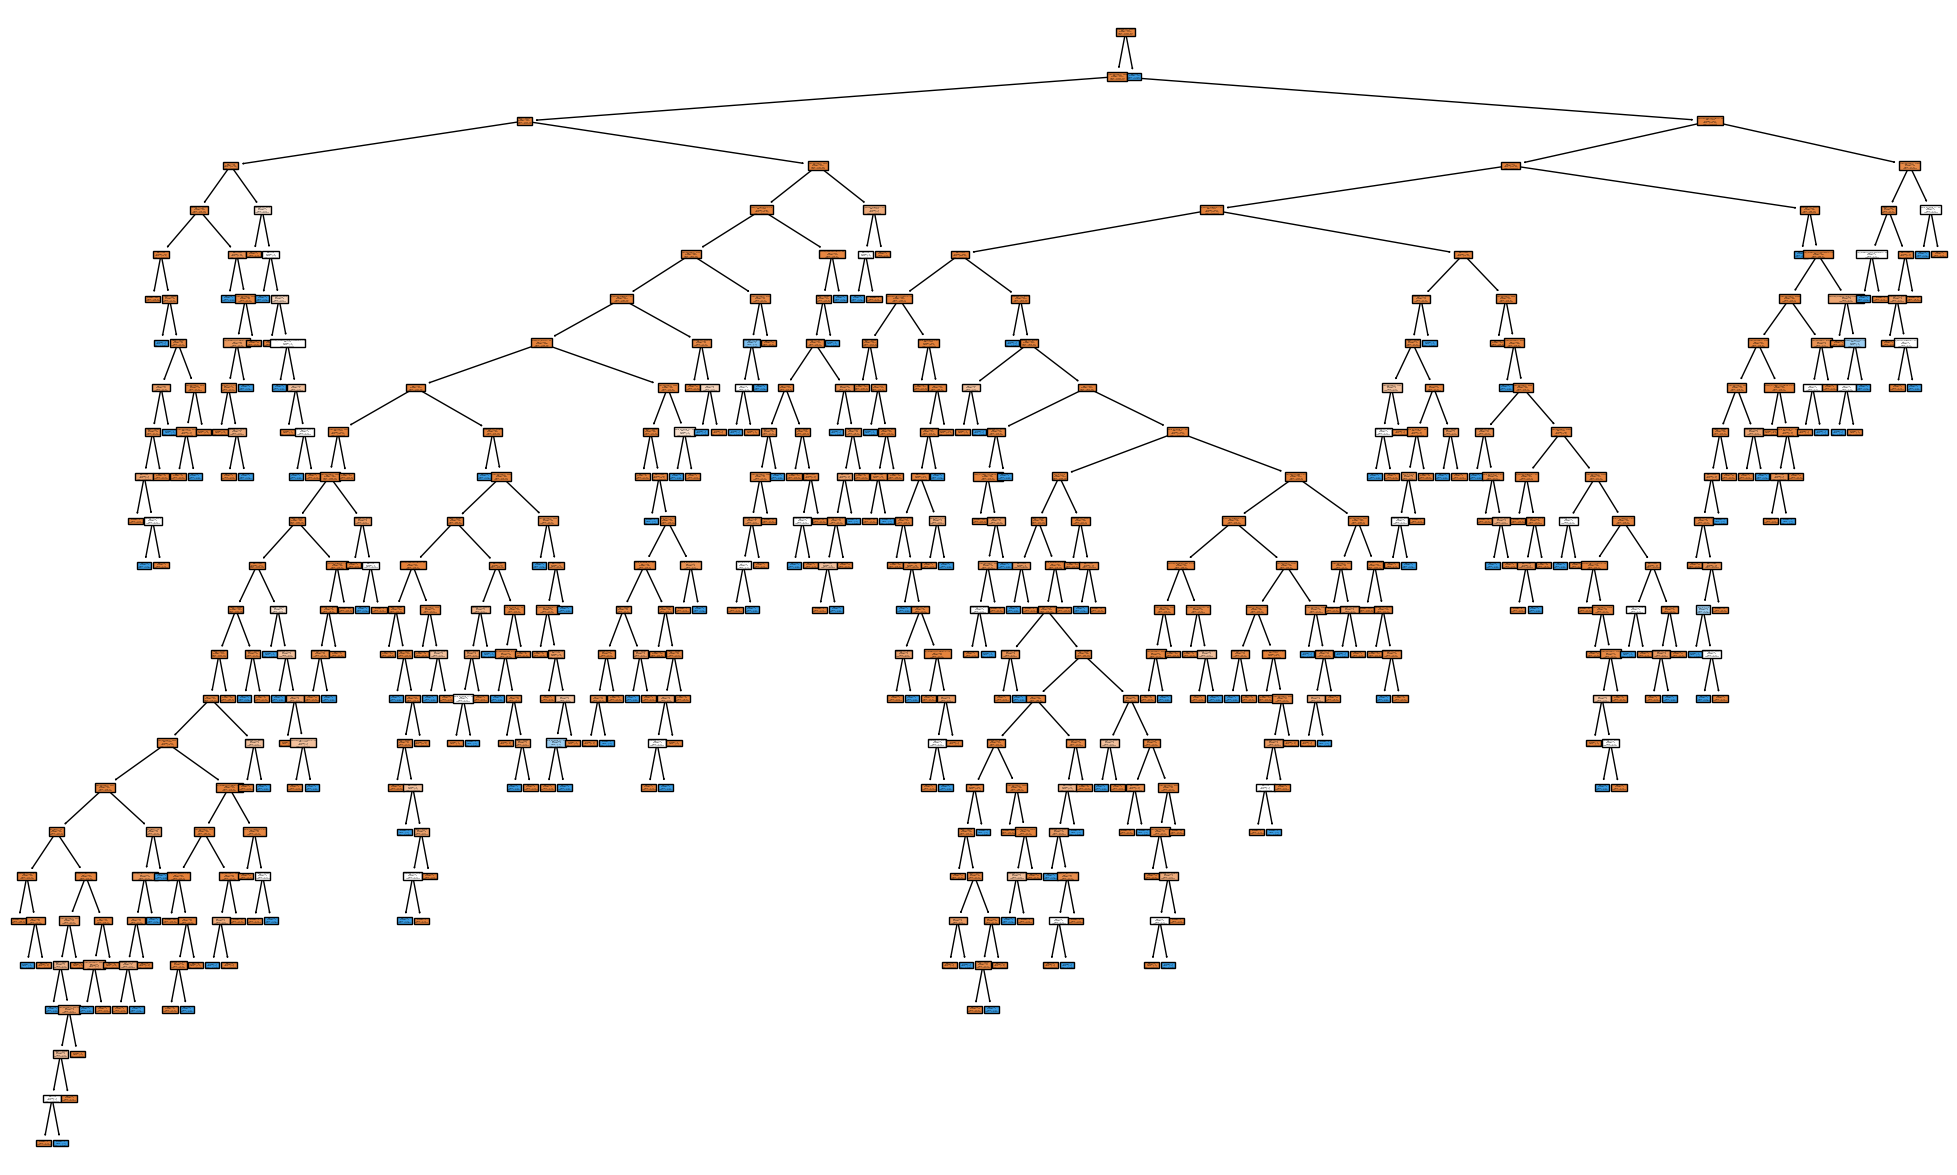

In [9]:
#3.Visualize a árvore. Talvez você queira aumentar um pouco a figura.
plt.figure(figsize=(25, 15))
plot_tree(dados_treino,
          filled=True,
          class_names=['Reprovados', 'Aprovados'],
         feature_names=alvo.columns);

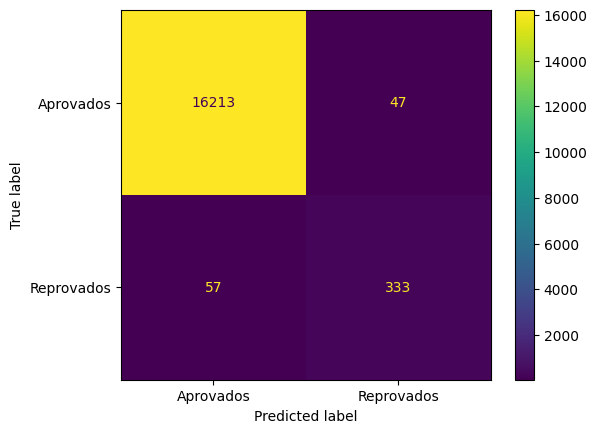

In [10]:
#4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" 
# e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
predictions = dados_treino.predict(alvo)
cm = confusion_matrix(target,predictions, labels= dados_treino.classes_ )
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Aprovados', 'Reprovados'])
disp.plot()

In [11]:
#5. Calcule a acurácia na base de treinamento
predict = dados_treino.predict(alvo)

In [12]:
accuracy_score(target, predict)

0.9937537537537537

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [13]:
#1 Classifique a base de teste de acordo com a árvore que você treinou no item 2.
dados_teste = DecisionTreeClassifier(random_state=100)
dados_teste = dados_treino.fit(alvo_teste, target_teste)

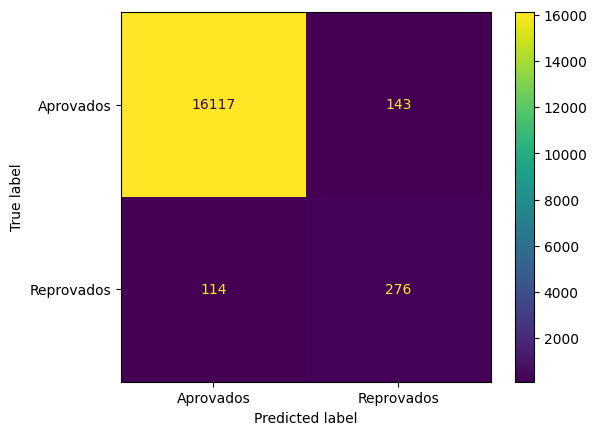

In [14]:
#2. Produza a visualização da matriz de confusão para a base de teste.
predictions = dados_treino.predict(alvo)
cm = confusion_matrix(target,predictions, labels= dados_teste.classes_ )
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Aprovados', 'Reprovados'])
disp.plot()

In [15]:
3#Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
predict = dados_teste.predict(alvo)
accuracy_score(target, predict)

0.9845645645645645

In [16]:
#4Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
# Use o random_state = 123 
clf = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf= 5 )

In [17]:
clf = clf.fit(alvo_train,target_train)

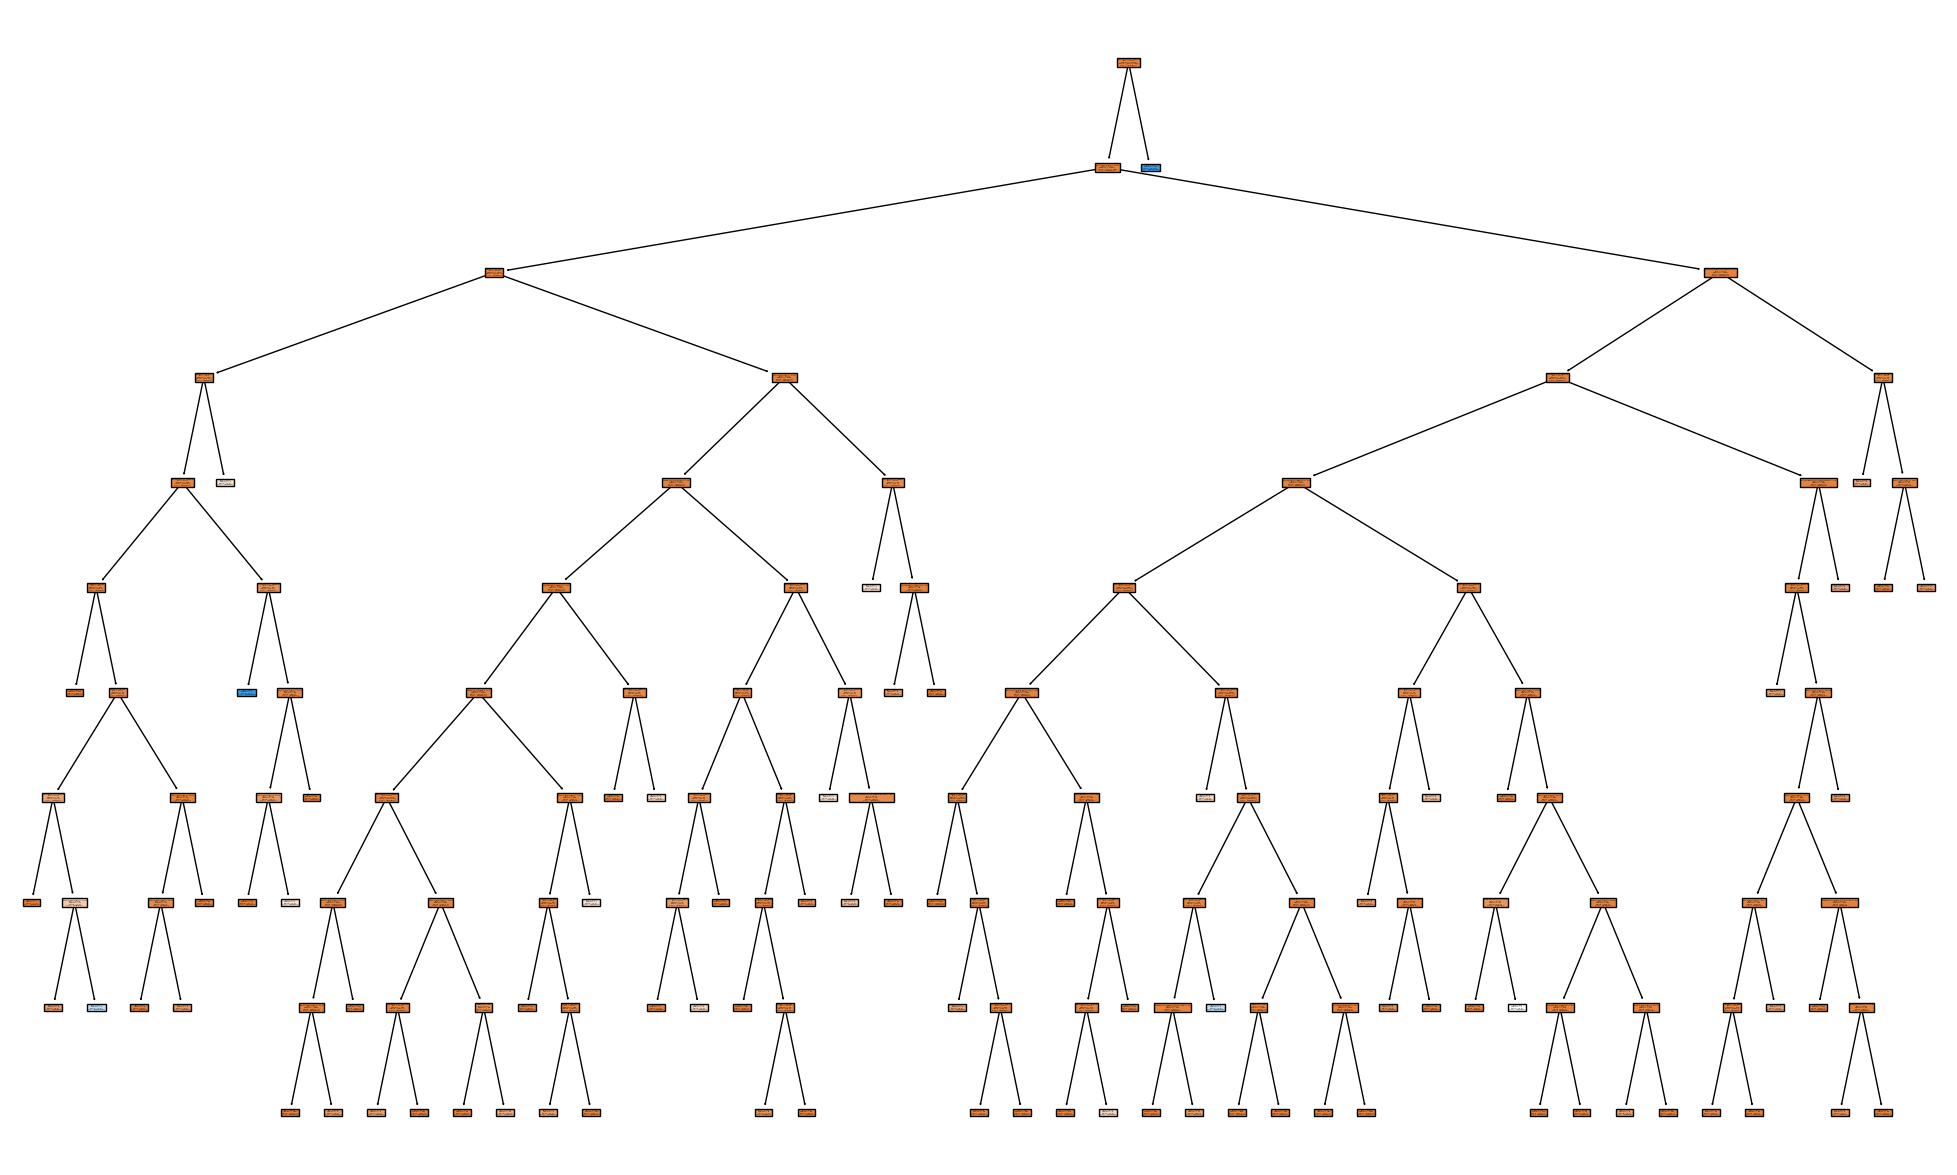

In [18]:
plt.figure(figsize=(25, 15))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
         feature_names=alvo.columns);
plt.savefig('arvore.png', format='png')
plt.show()

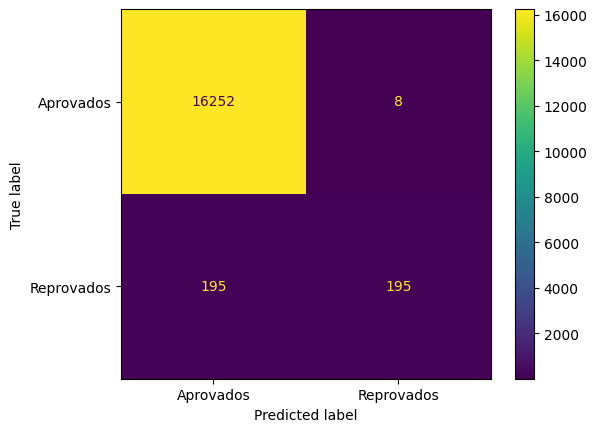

In [19]:
predictions = clf.predict(alvo)
cm = confusion_matrix(target,predictions, labels= clf.classes_ )
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Aprovados', 'Reprovados'])
disp.plot()

In [20]:
predict = clf.predict(alvo)
accuracy_score(target, predict)

0.9878078078078079

## Após análise foi identificado que se os contratos forem classificados como bons, o modelo deixaria de reprovar 195 clientes mau pagadores. Assim, tornando o modelo ineficiente, onde a acuracia não seria 0 pois o total do banco de dados de 16260 clientes são bons pagadores.